#**LIBRARIES**

In [3]:
import math
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from multiprocessing.dummy import Pool as ThreadPool

# **INICIALIZAN VARIABLES**

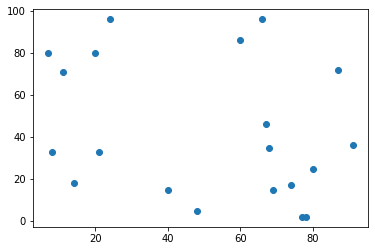

In [2]:
# Definir el número de ciudades a visitar.
n_cities = 20
# Generar las coordenadas para n ciudades.
cities = np.random.randint(1, 100, size=(n_cities, 2))
# Se toman los valores del eje 'x' y eje 'y'
cx = cities[:, 0]
cy = cities[:, 1]
# Se plotean las ciudades
fig, ax = plt.subplots()
ax.scatter(cx, cy)

# **DEFINIR FUNCIONES**

In [3]:
def genera_solucion_inicial():
    """
    Input: NA
    Output: Se genera una solución inicial en forma de array con tuples
    """
    np.random.shuffle(cities) #Modificar una secuencia en el lugar barajando su contenido 
    arr = np.reshape(cities, (5,4,2)) #Da una nueva forma a una matriz sin cambiar sus datos: 5 vendedores, con 4 ciudades, 2 columnas (coordenadas)
    
    return arr

In [4]:
def cost(ruta):
    """
    Input: valor de 'ruta'
    Output: Función de 'Costo', representación vectoriana de distancia.
    """
    cost = 0
    for vend in ruta:
        for x in range(-1,3):
            cost += math.sqrt((vend[x][0] - vend[x+1][0])**2 + abs(vend[x][1] - vend[x+1][1])**2)
            #cost += np.linalg.norm(vend[x])-np.linalg.norm(vend[x+1])
    
    return cost

In [5]:
def genera_vecino_aleatorio(ruta):
    """
    Input: Se ingresa la 'ruta' actual, a partir de la cual se creará un vecino. 
    Output: Se genera un vecino de manera aleatoria
    """
    #Se crea una copia de la variable 'ruta'
    aux = np.copy(ruta)
    #Se crean valores aleatorios de 0 a 5 y de 0 a 4.
    Xa = np.random.randint(0,5)
    Xb = np.random.randint(0,5)
    Ya = np.random.randint(0,4)
    Yb = np.random.randint(0,4)
    #Se crea una nueva copia de la información.
    aux2 = np.copy(aux[Xa][Ya])
    aux[Xa][Ya] = np.copy(aux[Xb][Yb])
    aux[Xb][Yb] = aux2

    return aux

In [13]:
def recocido (T0, a, L, Tf):
    """
    Input: Se ingresan las siguientes variables:
      * T0 = Temperatura inicial
      * a  = Factor por el cual se multiplica T0 para reducir su valor
      * L  = Número de iteraciones permitidas
      * Tf = Temperatura final
    Output: Se obtiene la 'Sa' (solución incial)
    """
    T = T0
    soluciones = []
    Sa = genera_solucion_inicial()
    soluciones.append(Sa)
    #Se crea un ciclo 'while' hasta bajar 'T' la temperatura por debajo de 'Tf'
    while T >= Tf:
        for count in range(L):
            Sc = genera_vecino_aleatorio(Sa)
            soluciones.append(Sc)
            d = cost(Sc)-cost(Sa) #Se hace una diferencia de las funciones de costo
            #Si el la dif de costo es < 0, se acepta. O si una función predeterminada 
              #es mayor a un valor aleatorio. 
            if (d < 0) or (np.random.uniform(0,1)<math.exp(-d/T)): 
                Sa = Sc #Se toma la nueva solución 
        T = T*a

    return Sa

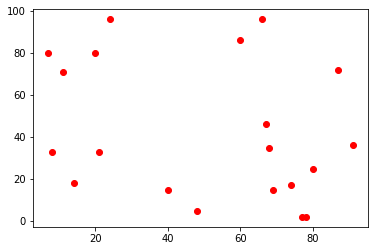

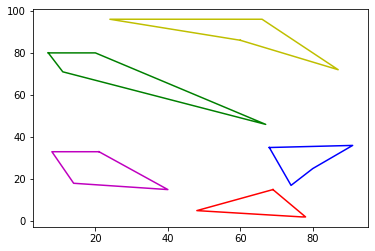

In [7]:
def graficarMejorSolucion(caminos, ciudades):
    """
    Input: Se ingresan los caminos actuales y las ciudades corresponientes
    Output: Se grafica la mejor solución para cada vendedor
    """
    aux = np.append(caminos[0],caminos[0][0])
    caminos = [np.reshape(np.append(cam,cam[0]), (5,2)) for cam in caminos]
    # Se toman las coordenadas de las ciudades 
    aux = caminos
    cx = ciudades[:, 0]
    cy = ciudades[:, 1] 
    # Graficar la información 
    s = plt.scatter(cx, cy, c='r')
    fig, ax = plt.subplots()
    ax.plot(aux[0][:,0], aux[0][:,1], c='r')
    ax.plot(aux[1][:,0], aux[1][:,1], c='g')
    ax.plot(aux[2][:,0], aux[2][:,1], c='b')
    ax.plot(aux[3][:,0], aux[3][:,1], c='y')
    ax.plot(aux[4][:,0], aux[4][:,1], c='m')

graficarMejorSolucion(recocido(40,.9,10, .1),cities)